## Functions

$f(x)=x²$

In [2]:
f(x) = x*x

In [3]:
f(2)

4

### Parentheses are optional

In [4]:
f 2

4

In [5]:
square = f

In [6]:
square 2 

4

### Function with multiple arguments

In [7]:
plus x y = x+y

In [8]:
plus 2 3

5

In [105]:
square plus 2 3

Non type-variable argument in the constraint: Num (a -> a -> a)
(Use FlexibleContexts to permit this)
When checking that `it' has the inferred type
  it :: forall a. (Num a, Num (a -> a -> a)) => a

In [106]:
square (plus 2 3)

25

### Function as argument

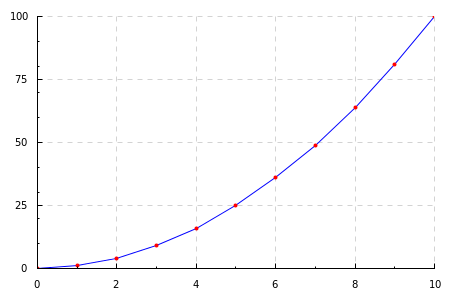

In [11]:
plot square

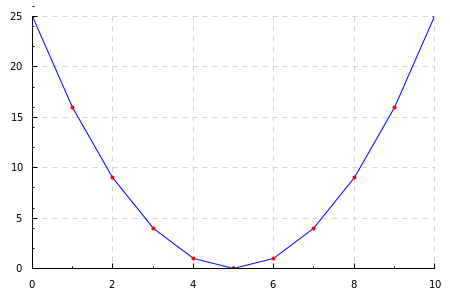

In [110]:
plot ( \x -> square (x - 5) )

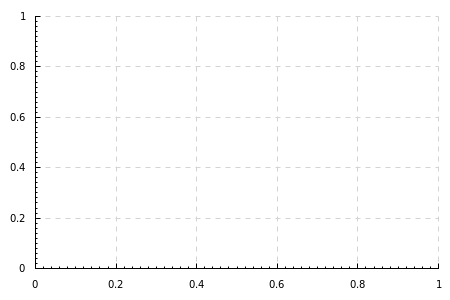

In [122]:
plotr ( \x -> square (x - 5) ) 1 0.1 6.0

In [12]:
import GHC.Float (sin)
sin 1.57

0.9999996829318346

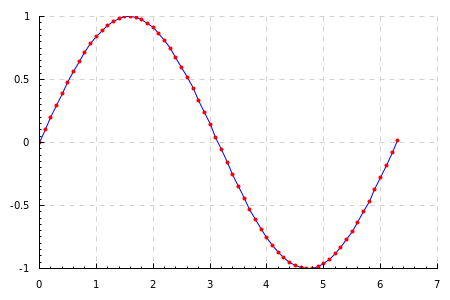

In [13]:
plotr sin 0 0.1 6.28

In [14]:
twice f x = f (f x) 

In [15]:
twice square 3

81

### A function can return a function

In [16]:
compose f g = \x -> f(g(x))

In [17]:
ss = compose sin square

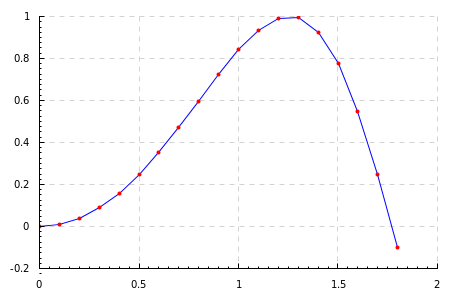

In [18]:
plotr ss 0 0.1 1.8

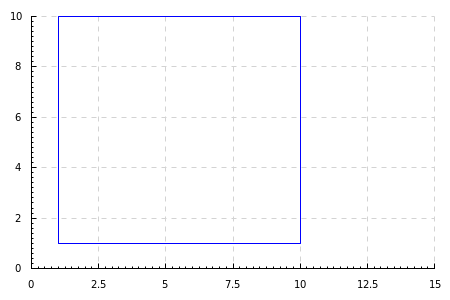

In [19]:
draw [[(1,1), (1,10), (10,10), (10,1), (1,1)] ]

### Functions can be partial
This is called _currying_

In [20]:
power4 = twice square

power4 2

16

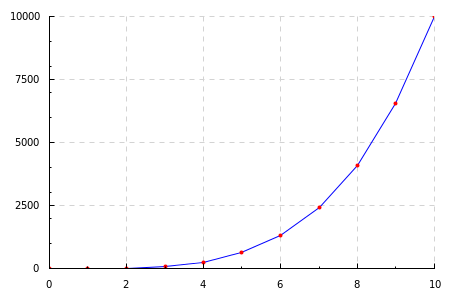

In [104]:
plot (twice square)

In [21]:
inc = plus 1

In [22]:
inc 4

5

In [23]:
(plus 1) 4

5

In [24]:
:t square

square :: forall a. Num a => a -> a

In [25]:
:t plus

plus :: forall a. Num a => a -> a -> a

Infix notation

In [89]:
1 `plus` 2 

3

In [90]:
(1 `plus`) 2

3

###  Operators are functions

In [178]:
(§) x y = (square x) `plus` y

In [179]:
2 § 2 § 4

40

In [180]:
($) = compose

In [181]:
ps = square $ inc

$ps(x)=(x+1)²$

In [177]:
ps 4

25

$diff(x,y) = x -y$

In [182]:
diff x y = x-y

In [186]:
diff 7 5

2

$rdiff(x,y) = y -x$

$flip(diff) = rdiff$

In [184]:
flip f x y = f y x

In [185]:
rdiff = flip diff

In [187]:
rdiff 7 5

-2

In [188]:
andThen = flip compose

In [190]:
ps = andThen inc square

In [192]:
ps 4

25

In [194]:
ps = inc `andThen` square

In [195]:
ps 4

25

In [197]:
(.) = andThen

In [201]:
(inc . square) 4

25

In [207]:
apply f x = f x

In [208]:
rapply = flip apply

In [215]:
rapply 3 square

9

In [218]:
(>>) = rapply

In [225]:
4 >> square

16

In [224]:
4 >> (inc . square)

25

In [226]:
4 >> inc >> square

25

In [228]:
(>>) x f = f x

In [229]:
4 >> inc >> square

25

### Constants are functions without parameters

In [97]:
a = 2

In [98]:
a

2

In [101]:
:t a

a :: forall a. Num a => a

In [102]:
a 3

Non type-variable argument in the constraint: Num (a -> t)
(Use FlexibleContexts to permit this)
When checking that `it' has the inferred type
  it :: forall a t. (Num a, Num (a -> t)) => t

### Pattern matching

In [26]:
guess 5 = "yes!"

In [27]:
guess 3

<interactive>:1:1-16: Non-exhaustive patterns in function guess

In [28]:
guess 5

"yes!"

In [29]:
guess 4 = "almost"

In [30]:
guess 4

"almost"

In [31]:
guess 5

<interactive>:1:1-18: Non-exhaustive patterns in function guess

In [32]:
guess 4 = "almost"
guess 5 = "yes!"
guess 6 = "almost"

In [33]:
guess 6

"almost"

In [34]:
guess 4 = "almost"
guess 5 = "yes!"
guess 6 = "almost"
guess x = "no!"

### Recursive function

In [35]:
fac 0 = 1
fac x = x*fac(x-1)

In [36]:
fac 4

24

In [135]:
fib 0 = 0
fib x = x+fib(x-1)

In [230]:
fib 5

15

$fac(x) = repeat(*, 1, x)$

$fib(x) = repeat(+, 0, x)$

In [232]:
repeat f p 0 = p
repeat f p x = f (repeat f p (x-1)) x

In [233]:
fib = repeat plus 0

In [234]:
fib 5

15

In [235]:
fac = repeat (*) 1

In [236]:
fac 4

24

In [237]:
:t repeat

repeat :: forall a t. (Eq a, Num a) => (t -> a -> t) -> t -> a -> t

In [238]:
:t compose

compose :: forall t t1 t2. (t1 -> t) -> (t2 -> t1) -> t2 -> t

In [240]:
chain = repeat (\t -> compose) (\x -> x)

Non type-variable argument in the constraint: Eq (t -> t)
(Use FlexibleContexts to permit this)
When checking that `interactive:Ghci3869.chain' has the inferred type
  interactive:Ghci3869.chain :: forall t. (Eq (t -> t), Num (t -> t)) => (t -> t) -> t -> t

## Data types

In [37]:
data Box x c = Attach x c

In [38]:
context (Attach x c) = c

In [39]:
b = Attach 3 4

In [40]:
context b

4

In [41]:
data Box x c = Attach x c | Only x

In [42]:
data Void = Nothing deriving IHaskellPrelude.Show

In [43]:
context (Attach x c) = c
context (Only x) = Nothing

In [44]:
context (Only 4)

Nothing

### Collections

In [45]:
data List a = L a (List a) | Empty deriving IHaskellPrelude.Show

In [46]:
l = L 1 (L 2 (L 3 Empty))

In [47]:
l

L 1 (L 2 (L 3 Empty))

In [48]:
head Empty = Nothing
head (L h t) = h

In [49]:
head l

No instance for (Num Void) arising from a use of `l'
In the first argument of `head', namely `l'
In the expression: head l
In an equation for `it': it = head l

In [50]:
:t head

head :: List Void -> Void

In [51]:
data Maybe a = Just a | Nothing deriving IHaskellPrelude.Show

In [52]:
head Empty = Nothing
head (L h t) = Just h

In [53]:
head l

Just 1

In [54]:
tail Empty = Nothing
tail (L h t) = Just t

In [55]:
tail l

Just (L 2 (L 3 Empty))

In [56]:
tail (L 23 Empty)

Just Empty

In [57]:
second x = head (tail x)

Couldn't match expected type `List a' with actual type `Maybe (List t)'
Relevant bindings include
  x :: List t (bound at <interactive>:1:8)
  second :: List t -> Maybe a (bound at <interactive>:1:1)
In the first argument of `head', namely `(tail x)'
In the expression: head (tail x)

In [58]:
:t tail

tail :: forall t. List t -> Maybe (List t)

In [59]:
:t head

head :: forall a. List a -> Maybe a

In [60]:
mhead Nothing = Nothing
mhead (Just x) = head x

In [61]:
mtail Nothing = Nothing
mtail (Just x) = tail x

In [62]:
mtail (Just (L 1 Empty))

Just Empty

In [63]:
second x = mhead (mtail (Just x))

In [64]:
second l

Just 2

In [65]:
second Empty

Nothing

Well, this is not practical to define all these "m" functions, no?

In [66]:
mbind f Nothing = Nothing
mbind f (Just x) = f x

In [67]:
second x = (mbind head) ((mbind tail ) (Just x))

In [68]:
second l

Just 2

In [69]:
:t mbind

mbind :: forall t a. (t -> Maybe a) -> Maybe t -> Maybe a

In [70]:
:t (+)

(+) :: forall a. Num a => a -> a -> a

In [72]:
second = (mbind head) $ (mbind tail ) $ Just

In [73]:
second l

Just 2

In [74]:
mcompose f g = (mbind f) $ (mbind g) $ Just

In [75]:
second = mcompose head tail 

In [76]:
second l

Just 2